# CHAPTER 13. 합성곱 신경망

In [1]:
# 기본 세팅
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
import tensorflow as tf


## 13.4 CNN 구조
- CNN은 합성층과 풀링층의 반복으로 이루어짐
- 네트워크를 통과할수록 이미지는 작아지지만, 특성맵(feature map)은 더 많이 가지게 됨
- 맨 윗층에는 피드포워드 신경망(feedforward network)이 추가되고, 마지막 층에서는 예측된 결과를 출력함
    * 피드포워드 신경망  
        동일한 층에서는 뉴런간 연결선을 갖지 않고, 인접한 다른 층의 뉴런에만 값을 전달  
        하위 레이어에서 전달된 특징들을 분류하게 됨  
        보통 완전 연결 신경망을 의미하는 것으로 사용되는 경우가 많음

![CNN 구조 그림](./images/1.png)

- CNN 구조 구성 시, 너무 큰 커널을 사용하지 않도록 주의해야 함  
   (3x3 커널 2개를 이어서 5x5 커널과 같은 효과를 낼 수 있지만, 파라미터 및 계산량은 더 적음)


- ILSVRC 이미지넷 대회 톱-5 에러율
![이미지넷 대회 톱-5 에러율](./images/5.png)

### 13.4.1 LeNet-5 (1998)

- 가장 널리 알려진 CNN구조
- 1998년 yann lecun(얀 르쿤)이 만들어 MNIST에 널리 이용됨  



- **LeNet-5 구조**
![LeNet-5 구조](./images/2.png)
![LeNet-5 구조2](./images/12.png)
  
  
- **LeNet-5 특징**  
  


1. 신경망에 들어가기 전에 28x28의 이미지가 zero padding 되어 32x32의 이미지가 됨.  
   신경망의 다른 부분에서는 패딩을 사용하지 않으므로, 진행할수록 이미지가 줄어들게 됨  


2. 합성곱층 다음에 풀링층으로 평균 풀링층을 이용함
     * 최근에는 LeNet을 구현 시 최대 풀링을 이용하여 구현하는 경우가 많음  


3. C3의 뉴런은 S2의 특성 맵 중 3-4개의 뉴런에만 연결 됨
![LeNet-5 C3 layer](./images/3.jpg)
   * 연산량의 크기를 줄이려는 이유도 있지만, 결정적인 이유는 연결의 symmetry를 깨줌으로써, 처음 convolution으로부터 얻은 6개의 low-level feature가 서로 다른 조합으로 섞이면서 global feature로 나타나기를 기대하기 때문
   
   
4. 출력이 10개의 Euclidean 거리(입력 벡터와 가중치 벡터 사이)로 구성되고, 각 출력이 이미지가 어느 숫자 클래스에 속하는지 측정함
   ![Lenet-5_4.png](./images/4.png)
     * 최근에는 잘못된 예측을 많이 줄여주고 그래디언트 값이 크며 빠르게 수렴되는 크로스 엔트로피 비용 함수가 선호됨
     
     
- **LeNet-5 동작 예**
![LeNet-5 동작](./images/6.gif)

### 13.4.2 AlexNet

- 2012년 Alex Krizhevsky(알렉스 크리체프스키)가 만듦
- 2012년 이미지넷 대회에서 17%(2위 26%)로 1위를 차지함  
  
  
- **AlexNet 구조**
![AlexNet 구조.png](./images/6.png)
![AlexNet 구조2.png](./images/7.png)
  

- **AlexNet 특징** 


1. 처음으로 합성곱층 위에 풀링층을 쌓지 않고 바로 합성곱층을 쌓은 구조
  
  
2. 과대적합을 줄이기 위해 2 가지 규제 사용
  - F8-F9의 출력에 드롭아웃(비율 50%)적용  
  - 훈련 이미지의 랜덤 증식(여러 간격 이동, 뒤집기, 조명 등)
  
3. LRN 정규화 단계를 포함함 
  - Local response normalization(LRN) : 가장 강하게 활성화된 뉴런이 같은 위치 다른 특성 맵의 뉴런을 억제하는 형태의 정규화
  ![AlexNet 구조2.png](./images/9.png)  
  - b_i : i 번째 특성 맵, u행 v열 위치한 뉴런의 정규화된 출력
  - a_i : RELU 지나고 정규화 전인 뉴런의 활성화 값 (u,v 위치에서 i번째 커널(필터))
  - k, alpha, beta, r : 하이퍼 파라미터, k 편향, r 깊이 반경(depth radius)
  - f_n : 특성맵 수
  - r이 5라면, (u,v) 위치의 i번째 특성맵의 뉴런은 (i-2)~(i+2) 특성 맵의 뉴런을 이용하여 정규화  
     
  - 특성 맵을 각기 다른 것과 구분되게 하여 일반화 성능 향상에 기여함

4. Overlapped pooling
  ![AlexNet 구조2.png](./images/8.png)
  - 풀링 커널이 움직이는 보폭인 stride를 커널 사이즈보다 작게 함
  - overlapping 풀링을 하면 풀링 커널이 중첩되면서 지나가는 반면, non-overlapping 풀링을 하면 중첩없이 진행됨
    overlapping 풀링이 top-1, top-5 에러율을 줄이는데 좀 더 효과가 있음    

   


5. GPU 분산을 위한 구조로 설계됨
![AlexNet 결과 예.png](./images/10.png)
  - GPU1은 주로 색상과 관련 없는 정보를 처리하고, GPU2는 색상과 관련된 정보를 처리함
  - C3과 완전 연결층에서만 GPU간 데이터 교환이 일어남

### 13.4.3 GoogLeNet
- 2014년 구글 리서치의 Christian Szegedy(크리스찬 세게디)등이 개발
- 2014년 이미지넷 대회에서 7%이하 에러율로 1위를 차지함  

- Alexnet과 비교했을 때, 망 깊이는 깊지만 파라미터 및 연산량은 낮은 특징이 있음


- **GoogLeNet 구조**
![GoogLeNet 구조.png](./images/13.png)
![GoogLeNet 구조.png](./images/17.png)
    

- **GoogLeNet 특징** 


1. 인셉션 모듈(inception module)의 이용
  - CNN은 층을 깊게 만드는 쪽으로 발전해가서, layer 수가 증가함에 따라 파라미터의 수도 증가하였음. 이는 과대적합과 많은 연산량의 원인이 됨
  - 이로 인해 sparse하게 연결되는 구조가 요구되었으나, 컴퓨터에서의 연산은 dense할수록 빨라 두 요구사항이 서로 상충되는 문제가 발생함
  - 이 두가지를 최대한 만족시키기 위해 인셉션 모듈이라는 구조를 사용하게 됨
    
  ![GoogLeNet 구조.png](./images/14.png)
  - 인셉션 모듈에서는 feature를 효율적으로 추출하기 위해 1x1, 3x3, 5x5의 Convolution 연산을 각각 수행함
  - 3x3의 최대 풀링 또한 수행하는데, 입력과 출력의 크기가 같아야하므로 풀링 연산에서는 드물게 Padding을 추가해줌
  - 즉, feature 추출 등의 과정은 최대한 sparse함을 유지하고자 했고, 행렬 연산 자체는 이들을 합쳐 최대한 dense하게 만들고자 함
  - 그러나 이렇게 되면 연산량이 너무 많아지는 문제가 발생함
  - 이를 해결하기 위해 1x1 Conv가 추가된 인셉션 모듈이 사용됨
  
  ![GoogLeNet 구조.png](./images/15.png)
  
  - 1x1 커널의 합성곱층은 입력보다 더 적은 특성맵을 출력하므로 차원을 줄이는 역할(병목층)을 담당함. 이는 3x3, 5x5 합성곱의 연산량을 상당히 낮출 수 있음
  - 1x1 합성곱층 이후에 바로 RELU를 적용하여 non-linearity를 더할 수 있음
  
  - 네트워크의 얕은 부분, 입력과 가까운 부분에는 Inception 모듈을 사용하지 않음.  
    논문에 따르면 이 부분에는 Inception의 효과가 없어서, Conv와 Pooling 연산을 수행함
  
  
2. Auxiliary classifier의 이용
  ![GoogLeNet 구조.png](./images/16.png)
  - 망이 깊어지면서 생기는 큰 문제 중 하나는 vanishing gradient 문제이며, 학습 속도가 아주 느려지거나 overfitting 문제를 야기함
  - 최근에는 활성함수로 ReLU를 사용하는데, Sigmoid나 cross-entropy를 사용할 때보다 많은 이점이 있으나,
    여러 layer를 거치면서 작은 값들이 계속 곱해지다 보면, 0근처로 수렴되면서 마찬가지로 vanishing gradient 문제에 빠질 수 있음
  - GoogLeNet에서는 이 문제를 극복하기 위해 Auxiliary classifier를 중간 2곳에 두었음  
  - Loss를 맨 끝뿐만 아니라 중간 중간에서 구하기 때문에 gradient가 적절하게 역전파됨  
    지나치게 결과에 영향을 주는 것을 막기 위해 auxiliary classifier의 loss는 0.3을 곱하여 사용
  

### 13.4.4 ResNet
- 2015년 이미지넷 대회에서 3.6% 에러율로 1위를 차지함  
- 총 152 개의 극도로 깊은 CNN 층을 사용하였음

- GoogLeNet과 비교했을 때, 두 구조 모두 목표까지 가기 위해 거치는 layer 수가 일반적인 구조에 비해 적은 특징이 있음  
  이 때, GoogLeNet의 경우 경로상의 모든 데이터를 거쳐야 하지만, ResNet은 거쳐가는 데이터가 바뀌므로,   
  좀 더 다양한 결과를 얻을 수 있음
  
  
- **ResNet 구조**
![ResNet 구조.png](./images/20.png)
![ResNet 구조2.png](./images/21.png)
  

- **ResNet 특징** 


1. Residual Learning
  - 망이 깊이는 깊어질 수록 학습 효과가 좋아지나 일정 수준 이상으로 깊어질 경우, 오히려 학습 효과가 떨어지는 문제가 발생됨
  ![ResNet 구조2.png](./images/22.png)
  - 실험 결과를 통해, 학습 오차와 테스트 오차 모두 56-layer의 결과가 20-layer보다 나쁘게 나오는 것을 확인하였고,   
    다른 학습 데이터에 대하여 layer 수를 달리하면서 실험을 해봐도 학습 결과가 오히려 더 나빠지는 것이 확인됨  
      
  - 망을 더욱 깊게 하면서, 깊이에 따른 학습 효과를 얻을 수 있는 방법에 대한 연구가 진행되면서 Residual Learning이 제안됨
  ![ResNet 구조2.png](./images/18.png)
  - 좌측은 평범한 CNN 망으로, 입력 x를 받아 2개의 weighted layer를 거쳐 출력 H(x)를 내고 학습을 통해 최적의 H(x)를 얻는 것이 목표임
  - 좌측의 망에서 H(x) 를 얻는 것이 목표가 아니라 H(x) - x를 얻는 것으로 목표를 수정할 경우,  
    즉 출력과 입력의 차를 얻을 수 있도록 학습을 하게 된다면,  
    2개의 weighted layer는 H(x) – x를 얻도록 학습이 될 것임  
    F(x) = H(x) - x라면, 결과적으로 출력 H(x)는 H(x) = F(x) + x 라고 할 수 있음
  - 좌측 망은 우측 망처럼 바뀌며,이것이 Residual Learning의 기본 구조가 됨  
    입력에서 바로 출력으로 연결되는 shortcut 연결이 생기게 되었음  
    이 shortcut은 파라미터가 없이 바로 연결이 되는 구조이기 때문에 연산량 관점에서는 덧셈이 추가되는 것 외에는 차이가 없음
  - 이는 깊은 망도 쉽게 최적화가 가능하며, 늘어난 깊이로 인해 정확도를 개선할 수 있는 효과를 줌 (+ 앙상블 효과)
    * 이전 구조에서 H(x)를 얻기 위한 학습을 했다면, 이제는 H(x) – x를 얻기 위한 학습을 하게 됨  
      최적의 경우라면 F(x)는 0이 되어야 하기 때문에 학습할 방향이 미리 결정이 되어, 이것이 pre-conditioning 역할을 해줌.   
      F(x)가 거의 0이 되는 방향으로 학습을 하게 되면 입력의 작은 움직임(fluctuation)을 쉽게 검출할 수 있게 됨  
      그런 의미에서 F(x)가 작은 움직임, 즉 나머지(residual)를 학습한다는 관점에서 residual learning이라고 불림
    * 입력과 같은 x가 그대로 출력에 연결이 되기 때문에 파라미터의 수에 영향이 없으며,   
      덧셈이 늘어나는 것을 제외하면 shortcut 연결을 통한 연산량 증가는 없음  
      그리고 몇 개의 layer를 건너 뛰면서 입력과 출력이 연결이 되기 때문에,  
      forward나 backward path가 단순해지는 효과를 얻을 수 있음
   
   - 실제 적용 결과는 아래와 같음
   ![ResNet 구조2.png](./images/23.png)
   
   - 50/101/152-layer에 대해서는 기본 구조를 조금 변경을 시켜 아래 그림과 같음
     (residual function은 1x1, 3x3, 1x1)
        ![ResNet 구조2.png](./images/24.png)
     Bottleneck 구조라고 이름을 붙인 이유는 차원을 줄였다가 뒤에서 차원을 늘리는 모습이 병목처럼 보이기 때문임
   - 위와 같이 구성한 이유는 연산 시간을 줄이기 위함임.  
     먼저 맨 처음 1x1 convolution은 GoogLeNet의 Inception 구조에서 살펴본 것처럼 dimension을 줄이기 위한 목적임  
     이렇게 dimension을 줄인 뒤 3x3 convolution을 수행하며, 마지막 1x1 convolution은 다시 dimension을 확대시키는 역할을 함.  
     결과적으로 3x3 convolution 2개를 곧바로 연결시킨 구조에 비해 연산량을 절감시킬 수 있음

### Appendix

- 출력 크기 계산 방법  
  입력(H,W), 필터(FH, FW), 출력(OH, OW), 패딩 P, 스트라이더 S인 경우,  
  OH = (H+2P-FH)/S + 1  
  OW = (W+2P-FW)/S + 1
  
  
  
- AlexNet과 같이 합성곱층위에 합성곱층을 쌓으면, pooling 연산으로 많은 정보가 사라지기 전에 복잡한 feature를 추출할 수 있음

## 13.5 연습 문제

**1. 이미지 분류에서 완전 연결 DNN보다 CNN이 나은 점은 무엇인가요?**
  -  **적은 파라미터** : 연속된 층이 부분적으로 연결되어 있고 많은 가중치를 재사용하기 때문에 완전 연결 DNN보다 적은 파라미터를 가짐. 이는 훈련속도의 향상 및 과대적합의 위험 감소 효과를 가지며, 더 적은 훈련데이터로도 더 나은 성능을 보일 수 있음.
  - **위치에 독립적인 특성 감지** : CNN은 어떤 특성을 감지할 수 있는 커널을 학습하면, 이미지의 어느 위치에 있는 특성이라도 감지할 수 있음. 그러나 DNN의 경우, 한 위치에 있는 특성을 학습하면, 특정 위치에 있는 특성만 감지가 가능함. 이미지는 보통 반복적인 패턴을 가지기 때문에, 이미지 분류/이미지 처리 작업 등에서, CNN은 더 적은 수의 훈련 샘플로 DNN보다 높은 일반화 성능을 낼 수 있음.
  - **주변 픽셀 정보 파악** : DNN은 주변의 픽셀이 비슷한지 여부를 파악할 수 없으나, CNN의 경우 이 정보를 내포함. 하위층은 이미지의 작은 영역에 있는 특성을 구별하고, 상위층은 저수준 특성을 더 큰 특성으로 연결하는데, 대부분의 이미지에 이러한 방식이 잘 맞아들어가기에, DNN보다 CNN이 이미지 구별에 유리함

**2. 3x3 커널, 스트라이드 2, SAME 패딩으로 된 합성곱층 세 개로 구성된 CNN이 있습니다.  
   가장 아래 층은 100개의 특성 맵을 출력하고, 중간 층은 200개, 가장 위의 층은 400개를 출력합니다.  
   입력 이미지는 200x300 픽셀의 RGB 이미지입니다.**  
   
   **이 CNN의 전체 파라미터 수는 얼마일까요?**  
   
   - conv1 : 3x3 커널, RGB 입력 --> 특성 맵 : 3x3x3 + 1 개의 편향으로 28개 파라미터를 가짐   
     이 때, 이 합성곱층이 100개의 특성 맵을 가지므로 전체 파라미터 수는 2800개(28x100)  
     conv2 : 3x3 커널, conv1 결과(100개 특성 맵)입력 --> 특성 맵 : 3x3x100 + 1 개의 편향으로 901개 파라미터를 가짐  
     이 때, 이 합성곱층이 200개의 특성 맵을 가지므로 전체 파라미터 수는 180200개(901x200)  
     conv3 : 3x3 커널, conv2 결과(200개 특성 맵)입력 --> 특성 맵 : 3x3x200 + 1 개의 편향으로 1801개 파라미터를 가짐  
     이 때, 이 합성곱층이 400개의 특성 맵을 가지므로 전체 파라미터 수는 903400개(1801x400)  
     
   
   **32비트 부동소수를 사용한다면 이 네트워크가 하나의 샘플을 예측하기 위해 적어도 얼마의 RAM이 필요할까요?**  
   
   - 각 층의 특성 맵의 크기 : 스트라이드 2, SAME 패딩을 사용하므로 수평, 수직 크기가 각 층에서 반으로 줄어들게 됨  
     입력 --> conv1 특성 맵 : 200x300 --> 100x150  
     conv1 특성 맵 --> conv2 특성 맵 : 100x150 --> 50x75   
     conv2 특성 맵 --> conv3 특성 맵 : 50x75 --> 25x38 (반올림)  
     
     32bit(=4byte) 부동소수를 사용하므로,  
     4x(특성맵 width)x(특성맵 height)x(특성맵 수)를 이용하여 각 층에 필요한 메모리를 구하면,  
     conv1 : 4x100x150x100 = 6000000 byte  
     conv2 : 4x50x75x200 = 3000000 byte  
     conv3 : 4x25x38x400 = 1520000 byte  
     로 각각 계산될 수 있음  
       
     이 때, 한 층의 계산이 모두 끝나게 되면, 이전 층에서 점유되었던 메모리가 반납될 수 있으므로,  
     conv2의 계산이 모두 끝나면, conv1에서 점유되었던 메모리가 반납되어 conv3의 계산에 이용될수 있음  
     따라서, 계산에 필요한 최소 메모리는 9000000 byte가 됨  
       
     여기에, 파라미터에 의해 점유되는 추가 메모리를 계산해보면,  
     앞서 전체 파라미터 수가 903400개로 구해졌고, 32bit 부동소수를 사용하므로,    
     903400x4 = 3613600 byte가 추가로 필요함    
         
     따라서, 필요한 전체 RAM은 적어도 12613600 byte (약 12MB)가 됨  
  
  
   **50개의 이미지를 미니배치로 훈련할 땐 얼마가 필요할까요?**   
 
   - 역전파를 사용하기 때문에, 역방향 계산이 시작될 때 까지 정방향에서 계산된 모든 값을 유지해야 함  
     따라서, 하나의 샘플일 때 모든 층에서 필요한 전체 RAM을 계산하고, 이미지 수를 곱해야 함  
    
     앞서 층마다 필요한 메모리 크기는 conv1, conv2, conv3이 각각 6000000, 3000000, 1520000 byte 였음  
     이들을 모두 더하면 10520000byte로, 한 이미지당 약 10MB의 메모리가 필요함을 알 수 있음  
     따라서, 50개 이미지에 대해서는 10x50=500MB 가 필요함 
     
     여기에, 입력 이미지를 위해 필요한 메모리를 구해보면,  
     50(이미지 수)x4(부동소수)x200(이미지 width)x300(이미지height)x3(RGB)로, 약 34.3MB임  
     
     또한, 파라미터에 의해 점유되는 추가 메모리는 앞서 구한 바와 같이 약 3.4MB(3613600 byte)임  
     
     이를 모두 더하여 값을 구해보면, 500+34.3+3.4=537.7MB임  
     따라서, 최적화가 잘 되어있다는 가정 하에, 약 537.7MB 정도의 메모리가 필요함
   

**3. 어떤 CNN을 훈련시킬 때 GPU에서 메모리 부족이 발생했다면, 이 문제를 해결하기 위해 시도해볼 수 있는 다섯가지는 무엇인가요?**

  - 미니배치의 크기 줄이기
  - 하나 이상의 층에서 스트라이드를 크게 하여 차원 감소 시키기
  - 하나 이상의 층 제거하기
  - 32bit 부동소수 대신 16bit 부동소수 사용하기
  - 여러 장치에 CNN을 분산하기

**4. 같은 크기의 스트라이드 합성곱층 대신 최대 풀링층을 추가하는 이유는 무엇인가요?**

  - 최대풀링층의 경우 파라미터가 없지만, 합성곱층은 파라미터를 많이 가지고 있음.  
    따라서 최대풀링층을 이용할 경우, 메모리를 절약할 수 있다는 장점이 있음

**5. LRN 층을 추가해야 할 때는 언제인가요?**

  - 상위층에서 필요한 저수준 특성을 많이 찾기 위해, 일반적으로는 하위층에 많이 추가되고 있음  
    LRN층은 특성 맵을 다른 것과 달리 특별하게 구분되게 하고, 넓은 범위의 특성을 탐색하도록 만들 수 있음

**6. LeNet-5와 비교해서 AlexNet의 혁신점은 무엇인가요? GoogLeNet과 ResNet의 혁신점은 무엇인가요?**

  - AlexNet : LeNet-5와 비교하여 더 크고깊으며, 합성곱층으로만 직접 쌓아올렸음  
  - GoogLeNet : 더 적은 파라미터로 더 깊은 신경망을 만들 수 있도록 인셉션 모듈을 적용함  
  - ResNet : 100개 층 이상의 신경망을 구성할 수 있도록, 스킵 연결을 활용함

**7. 자신만의 CNN을 만들고 MNIST 데이터셋에서 가능한 최대 정확도를 달성해보세요.**

- tensorflow에서 MNIST를 위한 예제에 제시하는 기본 CNN구조를 변경함
   * input -> conv1(5x5x32) -> pool1(1/2) -> conv2(5x5x64) -> pool2(1/2) -> FC(1024) -> output(10)
   
- 1) 적용 필터 변경 2) 드롭아웃 적용 으로 CNN을 바꾸어 보았음
    * 필터의 경우 기존 5x5 대신 3x3을 적용시켜 보았고, filter의 수를 변경해보았음
    * 드롭아웃의 경우, 적용 안함(원래 예제)/FC층/FC & pool2/FC & pool2 & pool1 에 드롭아웃 비율을 바꿔가며 적용해봄
   
- 1) 필터의 경우, 3x3 필터를 적용시키면서 좀 더 깊은 망이 형성되어서인지 원래 예제에 비해 결과가 좋았음
- 2) 드롭아웃의 경우, 의외로 적용시킨것과 안한것의 차이가 거의 없었고,
    FC와 pool2, pool1에 모두 적용했을때는 오히려 결과가 안좋아졌음
    
- 아래는 가장 좋은 결과를 보였던 3x3 필터, 드롭아웃 미적용 예로, 최고 98.29% 정확도를 보였음
   그 외 다른 조건의 test 결과 일부는 별도 파일로 첨부함

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
반복(Epoch): 0, 트레이닝 데이터 정확도: 0.140000
반복(Epoch): 100, 트레이닝 데이터 정확도: 0.720000
반복(Epoch): 200, 트레이닝 데이터 정확도: 0.760000
반복(Epoch): 300, 트레이닝 데이터 정확도: 0.880000
반복(Epoch): 400, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 500, 트레이닝 데이터 정확도: 0.900000
반복(Epoch): 600, 트레이닝 데이터 정확도: 0.960000
반복(Epoch): 700, 트레이닝 데이터 정확도: 0.920000
반복(Epoch): 800, 트레이닝 데이터 정확도: 0.920000
반복(Epoch): 900, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 1000, 트레이닝 데이터 정확도: 0.960000
반복(Epoch): 1100, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 1200, 트레이닝 데이터 정확도: 0.960000
반복(Epoch): 1300, 트레이닝 데이터 정확도: 0.960000
반복(Epoch): 1400, 트레이닝 데이터 정확도: 0.960000
반복(Epoch): 1500, 트레이닝 데이터 정확도: 0.960000
반복(Epoch): 1600, 트레이닝 데이터 정확도: 1.000000
반복(Epoch): 1700, 트레이닝 데이터 정확도: 0.960000
반복(Epoch): 1800, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 1900, 트레이닝 데이터 정확도: 0.960000
테스트 데이터 정확도: 0.981000


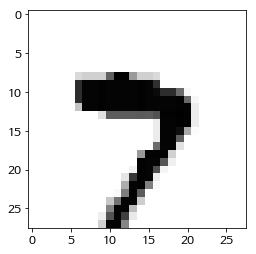

In [65]:
# MNIST 데이터를 다운로드
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# CNN 모델을 정의
def build_CNN_classifier(x):
    # MNIST 데이터를 3차원 형태로 reshape 
    #MNIST 데이터는 grayscale 이미지기 때문에 3번째차원(컬러채널)의 값은 1
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # 첫번째 Convolution Layer 
    # 3x3 Kernel Size를 가진 16개의 Filter를 적용
    # 28x28x1 -> 28x28x16
    W_conv1 = tf.Variable(tf.truncated_normal(shape=[3, 3, 1, 16], stddev=5e-2))
    b_conv1 = tf.Variable(tf.constant(0.1, shape=[16]))
    h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
    
    # 두번째 Convolution Layer 
    # 3x3 Kernel Size를 가진 32개의 Filter를 적용
    # 28x28x16 -> 28x28x32
    W_conv2 = tf.Variable(tf.truncated_normal(shape=[3, 3, 16, 32], stddev=5e-2))
    b_conv2 = tf.Variable(tf.constant(0.1, shape=[32]))
    h_conv2 = tf.nn.relu(tf.nn.conv2d(h_conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

    # 첫번째 Pooling Layer
    # Max Pooling을 이용해서 이미지의 크기를 1/2로 downsample
    # 28x28x32 -> 14x14x32
    h_pool1 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # 세번째 Convolutional Layer 
    # 3x3 Kernel Size를 가진 64개의 Filter를 적용
    # 14x14x32 -> 14x14x64
    W_conv3 = tf.Variable(tf.truncated_normal(shape=[3, 3, 32, 64], stddev=5e-2))
    b_conv3 = tf.Variable(tf.constant(0.1, shape=[64]))
    h_conv3 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv3, strides=[1, 1, 1, 1], padding='SAME') + b_conv3)
    
    # 네번째 Convolutional Layer 
    # 3x3 Kernel Size를 가진 64개의 Filter를 적용
    # 14x14x64 -> 14x14x64
    W_conv4 = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 64], stddev=5e-2))
    b_conv4 = tf.Variable(tf.constant(0.1, shape=[64]))
    h_conv4 = tf.nn.relu(tf.nn.conv2d(h_conv3, W_conv4, strides=[1, 1, 1, 1], padding='SAME') + b_conv4)

    # 두번째 Pooling Layer
    # Max Pooling을 이용해서 이미지의 크기를 1/2로 downsample
    # 14x14x64 -> 7x7x64
    h_pool2 = tf.nn.max_pool(h_conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Fully Connected Layer
    # 7x7 크기를 가진 64개의 activation map을 1024개의 특징들로 변환
    # 7x7x64(3136) -> 1024
    W_fc1 = tf.Variable(tf.truncated_normal(shape=[7 * 7 * 64, 1024], stddev=5e-2))
    b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    # Output Layer
    # 1024개의 특징들(feature)을 10개의 클래스-one-hot encoding으로 표현된 숫자 0~9-로 변환
    # 1024 -> 10
    W_output = tf.Variable(tf.truncated_normal(shape=[1024, 10], stddev=5e-2))
    b_output = tf.Variable(tf.constant(0.1, shape=[10]))
    logits = tf.matmul(h_fc1, W_output) + b_output
    y_pred = tf.nn.softmax(logits)

    return y_pred, logits

# 인풋, 아웃풋 데이터를 받기위한 플레이스홀더를 정의
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

# Convolutional Neural Networks(CNN)을 선언합니다.
y_pred, logits = build_CNN_classifier(x)

# Cross Entropy를 손실 함수(loss function)으로 정의하고 옵티마이저를 정의
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

# 정확도를 계산하는 연산을 추가
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 세션을 열어 실제 학습을 진행
with tf.Session() as sess:
    # 모든 변수들을 초기화합니다.
    sess.run(tf.global_variables_initializer())

    # 10000 Step만큼 최적화를 수행
    for i in range(2000):
        # 50개씩 MNIST 데이터 불러오기
        batch = mnist.train.next_batch(50)
        # 100 Step마다 training 데이터셋에 대한 정확도를 출력
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch[0], y: batch[1]})
            print("반복(Epoch): %d, 트레이닝 데이터 정확도: %f" % (i, train_accuracy))
        # 옵티마이저를 실행해 파라미터를 한스텝 업데이트
        sess.run([train_step], feed_dict={x: batch[0], y: batch[1]})

    # 학습이 끝나면 테스트 데이터에 대한 정확도를 출력
    print("테스트 데이터 정확도: %f" % accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
    testnum=mnist.validation.images[np.random.randint(0,len(mnist.validation.images))]
    plt.imshow(testnum.reshape([28,28]),cmap='Greys')
    testnum=testnum.reshape([1,784])
    print("아래 그림의 예측 결과는 " ,np.argmax(sess.run(logits, feed_dict={x:testnum}))," 입니다.")

- 다음 CNN은 위에서 만든 것과 비슷하지만 두 번째 합성곱 층에서 스트라이드 1을 사용하고 두 번째 합성곱 층 뒤에 25% 드롭아웃, 완전 연결층 뒤에 50% 드롭아웃을 적용한 것이 다릅니다. 그리고 조기 종료를 사용하여 훈련합니다. MNIST에서 약 99.2% 정확도를 달성합니다. 최고의 수준은 아니지만 나쁘지 않네요. 더 좋게 만들 수 있을까요?

In [39]:
# 책에서 주어진 예제
#import tensorflow as tf

height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25

pool3_fmaps = conv2_fmaps

n_fc1 = 128
fc1_dropout_rate = 0.5

n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14])
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.dropout instead.


In [40]:
# 데이터 로드
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/")

In [41]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 1s 0us/step


In [42]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

- 조기 종료의 속도를 높이기 위해 아래와 같은 함수를 사용함  
- 가장 좋은 모델을 디스크에 저장하는 대신 메모리에 저장한 후, 훈련이 끝난 후에 가장 좋은 모델을 복원함

In [43]:
# get_model_params()는 모델의 상태(즉, 모든 변수의 값)를 얻어옴
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

#restore_model_params() 함수는 이전 상태를 복원함
def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

- 조기 종료 시나리오
  * 100번 훈련 반복마다 검증 세트에서 모델을 평가
  * 모델의 성능이 이전에 찾은 가장 좋은 모델보다 낫다면 이 모델을 메모리에 저장
  * 연속해서 100번의 평가 동안에도 진전이 없다면 훈련 중지
  * 훈련이 끝난 후에 가장 좋은 모델을 복원

In [44]:
n_epochs = 1000
batch_size = 50

best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = len(X_train) // batch_size
        for iteration in range(n_batches):
            X_batch, y_batch = next(shuffle_batch(X_train, y_train, batch_size))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: X_valid, y: y_valid})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print("에포크 {}, 배치 데이터 정확도: {:.4f}%, 검증 세트 정확도: {:.4f}%, 검증 세트에서 최선의 손실: {:.6f}".format(
                  epoch, acc_batch * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("조기 종료!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    # CPU를 사용하거나 GPU 메모리가 크다면 테스트 세트 전체를 평가해 보세요.
    acc_test = accuracy.eval(feed_dict={X: X_test[:5000],
                                        y: y_test[:5000]})
    print("테스트 세트에서 최종 정확도:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

에포크 0, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 98.3200%, 검증 세트에서 최선의 손실: 0.053184
에포크 1, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 98.9600%, 검증 세트에서 최선의 손실: 0.047204
에포크 2, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 98.8200%, 검증 세트에서 최선의 손실: 0.040863
에포크 3, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 98.9200%, 검증 세트에서 최선의 손실: 0.040035
에포크 4, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 99.0600%, 검증 세트에서 최선의 손실: 0.034822
에포크 5, 배치 데이터 정확도: 98.0000%, 검증 세트 정확도: 98.7800%, 검증 세트에서 최선의 손실: 0.034822
에포크 6, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 98.9600%, 검증 세트에서 최선의 손실: 0.034822
에포크 7, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 99.2000%, 검증 세트에서 최선의 손실: 0.034822
에포크 8, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 99.0000%, 검증 세트에서 최선의 손실: 0.034822
에포크 9, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 99.1000%, 검증 세트에서 최선의 손실: 0.034822
에포크 10, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 98.9000%, 검증 세트에서 최선의 손실: 0.034822
에포크 11, 배치 데이터 정확도: 100.0000%, 검증 세트 정확도: 99.2400%, 검증 세트에서 최선의 손실: 0.034822
조기 종료!
테스트 세트에서 최종 정확도: 0.9866


**8. Inception v3를 사용해 큰 크기의 이미지를 분류해보겠습니다.**    

8. a. 여러 종류의 동물 이미지를 내려받으세요.  
    matplotlib.image.mpimg.imread() 함수나 scipy.misc.imread() 함수를 사용해 파이썬에서 이미지를 로드하세요.  
    이미지 크기를 바꾸고 잘라내어 299 × 299픽셀로 만들고, 알파 채널을 포함하지 않고 세 개의 채널(RGB)만 있는지 확인합니다.  
    Inception에서 훈련에 사용한 이미지들은 -1.0에서 1.0 사이의 값을 가지도록 전처리되었습니다.  
    따라서 여기서 준비한 이미지들도 마찬가지로 전처리되어야 합니다.

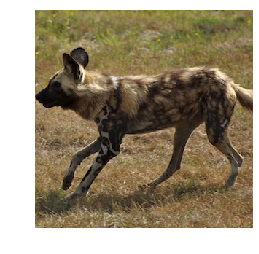

In [2]:
width = 299
height = 299
channels = 3

import matplotlib.image as mpimg
test_image = mpimg.imread(os.path.join("images","test_image.png"))[:, :, :channels]
plt.imshow(test_image)
plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


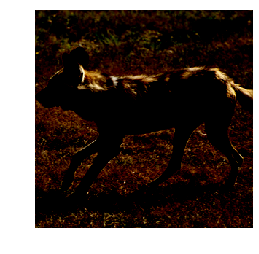

In [3]:
# test_image 범위를 [0, 1] 에서 [-1, 1] 로 바꾸어줌
test_image = 2 * test_image - 1
plt.imshow(test_image)
plt.axis("off")
plt.show()

8. b.가장 최근에 미리 훈련된 Inception v3 모델을 내려받습니다.   
  체크포인트는 https://goo.gl/XgKiSi 에서 내려받을 수 있습니다.  
  클래스 이름의 목록은 https://goo.gl/brXRtZ 에 있습니다.   
  하지만 이 목록 맨 위에 background 클래스를 추가해야 합니다.  

In [4]:
import sys
import tarfile
from six.moves import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [5]:
fetch_pretrained_inception_v3()

In [6]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("datasets", "inception", "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)

In [7]:
class_names = ["background"] + load_class_names()
class_names[:5]

['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

8. c. 다음과 같이 inceptionv3()함수를 호출해 Inception v3 모델을 만듭니다.  
    반드시inception_v3_arg_scope() 함수로 생성한 이름 범위 안에서 만들어야 합니다. 
    또한 다음과 같이 is_training=False와 num_classes=1001로 지정해야 합니다.

In [10]:
#import tensorflow as tf
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

8. d. 세션을 열고 Saver를 사용해 앞서 내받은 미리 훈련된 모델의 체크포인트를 복원하세요.

In [11]:
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

INFO:tensorflow:Restoring parameters from datasets\inception\inception_v3.ckpt


8. e. 모델을 실행해서 준비한 이미지를 분류해보세요.  
    이미지마다 상위 다섯 개 예측을 추정 확률과 함께 출력해보세요. 모델이 얼마나 정확한가요?

In [12]:
X_test = test_image.reshape(-1, height, width, channels)

with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from datasets\inception\inception_v3.ckpt


In [13]:
most_likely_class_index = np.argmax(predictions_val[0])
print(most_likely_class_index)
class_names[most_likely_class_index]

276


'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus'

In [14]:
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus: 93.13%
hyena, hyaena: 2.57%
European fire salamander, Salamandra salamandra: 0.06%
bearskin, busby, shako: 0.05%
swimming trunks, bathing trunks: 0.05%


**9. 큰 크기의 이미지에 대해 전이 학습을 해보겠습니다.**    

9. a. 클래스마다 최소한 100개의 이미지가 들어 있는 훈련 세트를 만드세요.  
    예를 들어 위치에 따라 (해변, 산, 도심 등) 자신의 사진을 분류하거나, 꽃 데이터셋(https://goo.gl/EgJVXZ )이나 MIT의 장소 데이터셋(http://places.csail.mit.edu/) (등록이 필요하고 매우 큽니다) 같은 기존의 데이터셋을 사용할 수도 있습니다.

In [15]:
# 꽃 데이터 셋 다운로드
import sys
import tarfile
from six.moves import urllib

FLOWERS_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"
FLOWERS_PATH = os.path.join("datasets", "flowers")

def fetch_flowers(url=FLOWERS_URL, path=FLOWERS_PATH):
    if os.path.exists(FLOWERS_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "flower_photos.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    flowers_tgz = tarfile.open(tgz_path)
    flowers_tgz.extractall(path=path)
    flowers_tgz.close()
    os.remove(tgz_path)

In [16]:
fetch_flowers()

In [17]:
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])
# flower에 포함된 꽃의 종류 확인
flower_classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [18]:
# 클래스 별 모든 이미지 파일의 경로를 리스트로 만듦
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))

In [19]:
#실행할 때마다 결과를 일정하게 만들기 위해 이미지 경로를 정렬
for paths in image_paths.values():
    paths.sort()  

클래스: daisy


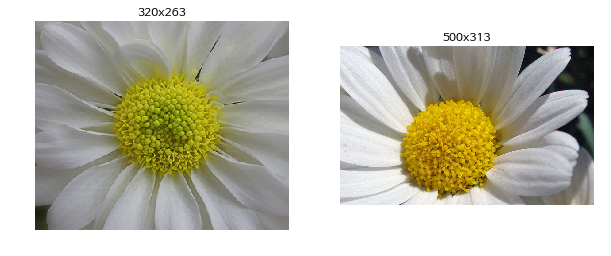

클래스: dandelion


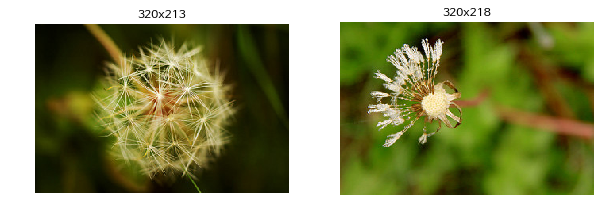

클래스: roses


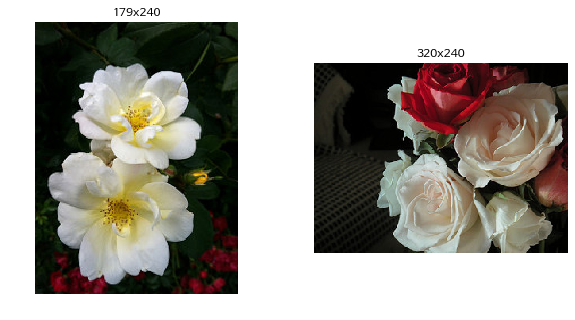

클래스: sunflowers


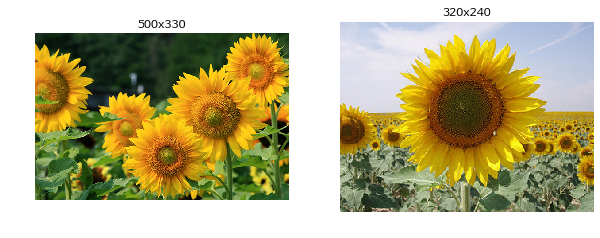

클래스: tulips


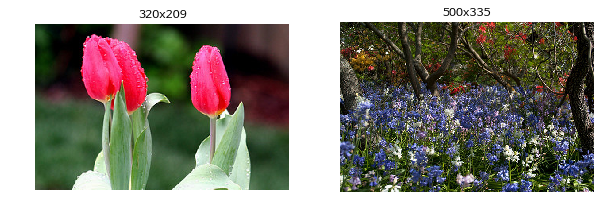

In [20]:
# 클래스 별 이미지 확인
import matplotlib.image as mpimg

n_examples_per_class = 2

for flower_class in flower_classes:
    print("클래스:", flower_class)
    plt.figure(figsize=(10,5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :channels]
        plt.subplot(100 + n_examples_per_class * 10 + index + 1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()

9. b.전처리 단계에서 이미지 크기를 줄이고 잘라서 299 × 299 크기로 만들고 무작위성을 추가하여 데이터 증식을 하세요. 

In [21]:
# from scipy.misc import imresize
from PIL import Image

def prepare_image(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    """데이터 증식을 위해 이미지를 랜덤하게 자르거나 확대."""

    # 먼저 이미지에서 타깃 크기에 맞는 최대 비율의 네모 상자 크기를 찾음
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    # 이 상자의 크기를 랜덤한 비율로 줄임(1.0에서 1.0+`max_zoom` 사이의 난수로 나눔).
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    # 이미지의 위치를 랜덤하게 선택
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    # 이미지를 자름
    image = image[y0:y1, x0:x1]

    # 50% 확률로 이미지를 수평으로 반전
    if np.random.rand() < 0.5:
        image = np.fliplr(image)

    # 타깃 크기에 맞도록 이미지 크기를 변경
    #image = imresize(image, (target_width, target_height))
    image = np.array(Image.fromarray(image).resize((target_width, target_height)))
    
    # 마지막으로 컬러 값이 0.0에서부터 1.0 사이의 32비트 값이 되도록 만듦.
    return image.astype(np.float32) / 255

- 테스트할 때에는 전처리 단계가 가능한 간단해야 하므로, 신경망에 이미지를 삽입하기 위해 꼭 필요한 것만 수행함. 위 함수에 training 매개변수를 추가해서 False일 때는 전처리가 기본적인 것만 수행하도록 만들 수 있음(즉, 이미지 반전을 제외하고 이미지 중앙 부분만 자름).

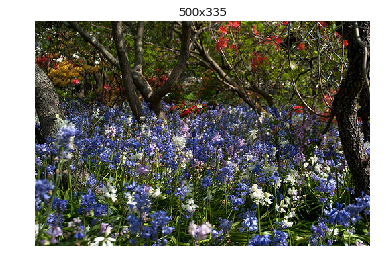

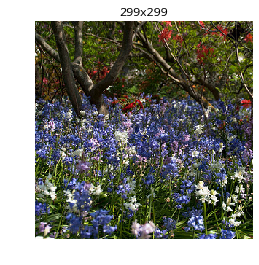

In [22]:
#원래 이미지와 결과 이미지 확인

#원본
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()

#결과
prepared_image = prepare_image(example_image)

plt.figure(figsize=(4, 4))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

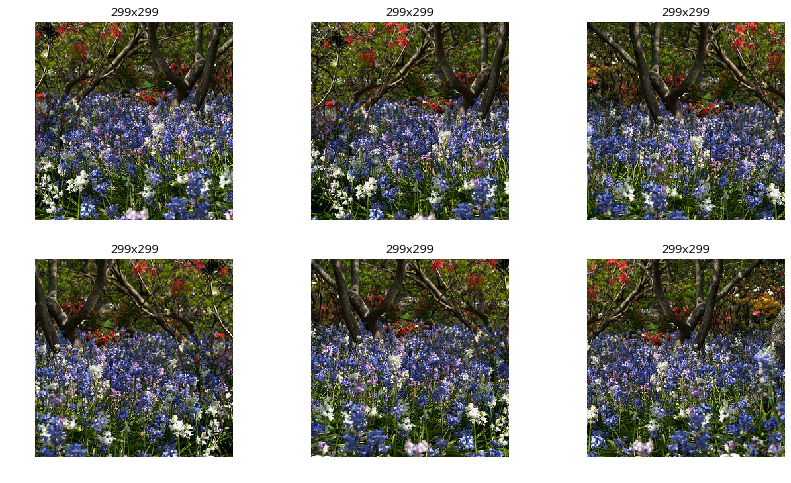

In [23]:
# 다양한 전처리 결과

rows, cols = 2, 3

plt.figure(figsize=(14, 8))
for row in range(rows):
    for col in range(cols):
        prepared_image = prepare_image(example_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()

9. c. 이전 연습문제의 미리 훈련된 Inception v3 모델을 사용해 병목층(즉, 출력층 직전의 마지막 층)까지의 모든 층을 동결하고, 이 분류 문제에 맞는 적절한 출력 개수를 가진 출력층으로 바꾸세요(예를 들어 꽃 데이터셋은 다섯 개의 상호 배타적인 클래스를 가지고 있으므로 출력층은 다섯 개의 뉴런을 가져야 하고 소프트맥스 활성화 함수를 사용해야 합니다).

- inception v3 그래프 불러오기
- 위와 다르게 이번에는 텐서플로가 이 신경망을 훈련할지 말지 알려주기 위해 training 플레이스홀더를 사용함  
  (드롭아웃과 배치 정규화 같은 연산을 위해서)

In [24]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training)

inception_saver = tf.train.Saver()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


- 그래프에서 새로운 출력층을 추가할 지점(현재 출력층 직전의 층)을 찾기 위해 아래와 같은 방법을 사용함

In [25]:
end_points

{'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=float32>,
 'Mixed_5b': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5b/concat:0' shape=(?, 35, 35, 256) dtype=float32>,
 'Mixed_5c': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5c/concat:0' shape=(?,

- Dropout의 출력층이 현재 출력층 직전의 층이므로, "PreLogits"가 정확히 우리가 원하는 층임

In [26]:
end_points["PreLogits"]

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

In [27]:
# PreLogits의 두 번째, 세 번째 차원을 제거
prelogits = tf.squeeze(end_points["PreLogits"], axis=[1, 2])

# 최종 FC층을 추가
n_outputs = len(flower_classes)

with tf.name_scope("new_output_layer"):
    flower_logits = tf.layers.dense(prelogits, n_outputs, name="flower_logits")
    Y_proba = tf.nn.softmax(flower_logits, name="Y_proba")

Instructions for updating:
Use keras.layers.dense instead.


- 마지막으로 필요한 연산 추가

  * 타깃(y)을 위한 플레이스홀더
  * 분류 작업에 사용되는 크로스엔트로피 손실 함수
  * 비용 함수를 최소화시키는 훈련 연산을 만드는 옵티마이저
  * 모델의 정확도를 측정할 몇 개의 연산
  * initializer와 Saver 객체


- 출력층 직전의 마지막 층까지 모두 동결시켜야 하므로(출력층만 훈련시켜야하므로), optimizer의 minimize() 메서드에 훈련시킬 변수 목록을 전달해야 함

In [28]:
y = tf.placeholder(tf.int32, shape=[None])

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=flower_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    flower_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="flower_logits")
    training_op = optimizer.minimize(loss, var_list=flower_vars)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(flower_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver() 

In [29]:
[v.name for v in flower_vars]

['flower_logits/kernel:0', 'flower_logits/bias:0']

9. d. 준비한 데이터셋을 훈련 세트와 테스트 세트로 나누세요. 훈련 세트에서 모델을 훈련시키고 테스트 세트에서 모델을 평가해보세요.

In [30]:
#클래스를 문자열대신 숫자로 표현
flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
flower_class_ids

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [31]:
# 파일 경로/클래스 쌍으로 리스트를 구성(데이터를 쉽게 섞기 위함)
flower_paths_and_classes = []
for flower_class, paths in image_paths.items():
    for path in paths:
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))
        
# 다음 데이터셋을 섞고 훈련 세트와 테스트 세트로 나눔
test_ratio = 0.2
train_size = int(len(flower_paths_and_classes) * (1 - test_ratio))

np.random.shuffle(flower_paths_and_classes)

flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]

# 훈련 세트에서 처음 3개의 샘플을 확인
flower_paths_and_classes_train[:3]

[('datasets\\flowers\\flower_photos\\daisy\\19834392829_7d697871f6.jpg', 0),
 ('datasets\\flowers\\flower_photos\\sunflowers\\5957007921_62333981d2_n.jpg',
  3),
 ('datasets\\flowers\\flower_photos\\tulips\\7166635566_ee240b5408_n.jpg', 4)]

In [34]:
# 이미지 전처리 함수
from random import sample

def prepare_batch(flower_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepared_images = [prepare_image(image) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception expects colors ranging from -1 to 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return X_batch, y_batch

X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size=4)
print(X_batch.shape)
print(X_batch.dtype)
print(y_batch.shape)
print(y_batch.dtype)

X_test, y_test = prepare_batch(flower_paths_and_classes_test, batch_size=len(flower_paths_and_classes_test))
print(X_test.shape)

(4, 299, 299, 3)
float32
(4,)
int32
(734, 299, 299, 3)


In [37]:
# 신경망 훈련
n_epochs = 10
batch_size = 40
n_iterations_per_epoch = len(flower_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

    for epoch in range(n_epochs):
        print("에포크", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})

        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  훈련 정확도:", acc_train)

        save_path = saver.save(sess, "./my_flowers_model")

INFO:tensorflow:Restoring parameters from datasets\inception\inception_v3.ckpt
에포크 0.........................................................................  훈련 정확도: 0.55
에포크 1.........................................................................  훈련 정확도: 0.575
에포크 2.........................................................................  훈련 정확도: 0.625
에포크 3.........................................................................  훈련 정확도: 0.7
에포크 4.........................................................................  훈련 정확도: 0.7
에포크 5.........................................................................  훈련 정확도: 0.75
에포크 6.........................................................................  훈련 정확도: 0.625
에포크 7.........................................................................  훈련 정확도: 0.775
에포크 8.........................................................................  훈련 정확도: 0.65
에포크 9.........................................................................  훈련

In [38]:
n_test_batches = 10
X_test_batches = np.array_split(X_test, n_test_batches)
y_test_batches = np.array_split(y_test, n_test_batches)

with tf.Session() as sess:
    saver.restore(sess, "./my_flowers_model")

    print("테스트 세트에서 최종 정확도를 계산합니다 (시간이 좀 걸립니다)...")
    acc_test = np.mean([
        accuracy.eval(feed_dict={X: X_test_batch, y: y_test_batch})
        for X_test_batch, y_test_batch in zip(X_test_batches, y_test_batches)])
    print("테스트 정확도:", acc_test)

INFO:tensorflow:Restoring parameters from ./my_flowers_model
테스트 세트에서 최종 정확도를 계산합니다 (시간이 좀 걸립니다)...
테스트 정확도: 0.6593114


- 65.9% 정확도는 좋지 않지만 이는 출력층을 제외하고 모든 층을 동결하여 10번의 에포크만 실행한 것임.
- 좀 더 나은 GPU를 가지고 있다면 더 오랫동안 훈련을 시켜볼 수 있음. 

**10. 텐서플로의 딥드림 설명서(https://goo.gl/4b2s6g )를 살펴보세요. CNN으로 학습한 패턴을 시각화하거나 딥러닝을 사용해 그림을 생성하는 재미있는 방법을 배울 수 있습니다.**

In [1]:
# boilerplate code
from __future__ import print_function
import os
from io import BytesIO
import numpy as np
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML


import tensorflow as tf

In [45]:
model_fn = 'tensorflow_inception_graph.pb'

# creating TensorFlow session and loading the model
graph = tf.Graph()
sess = tf.InteractiveSession(graph=graph)
with tf.gfile.FastGFile(model_fn, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
t_input = tf.placeholder(np.float32, name='input') # define the input tensor
imagenet_mean = 117.0
t_preprocessed = tf.expand_dims(t_input-imagenet_mean, 0)
tf.import_graph_def(graph_def, {'input':t_preprocessed})

Instructions for updating:
Use tf.gfile.GFile.


In [49]:
layers = [op.name for op in graph.get_operations() if op.type=='Conv2D' and 'import/' in op.name]
feature_nums = [int(graph.get_tensor_by_name(name+':0').get_shape()[-1]) for name in layers]

print('Number of layers', len(layers))
print('Total number of feature channels:', sum(feature_nums))


# Helper functions for TF Graph visualization

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size,"utf-8")
    return strip_def
  
def rename_nodes(graph_def, rename_func):
    res_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = res_def.node.add() 
        n.MergeFrom(n0)
        n.name = rename_func(n.name)
        for i, s in enumerate(n.input):
            n.input[i] = rename_func(s) if s[0]!='^' else '^'+rename_func(s[1:])
    return res_def
  
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
  
    iframe = """
        <iframe seamless style="width:800px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Visualizing the network graph. Be sure expand the "mixed" nodes to see their 
# internal structure. We are going to visualize "Conv2D" nodes.
tmp_def = rename_nodes(graph_def, lambda s:"/".join(s.split('_',1)))
show_graph(tmp_def)

Number of layers 59
Total number of feature channels: 7548


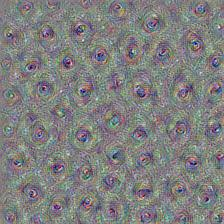

In [50]:
# Picking some internal layer. Note that we use outputs before applying the ReLU nonlinearity
# to have non-zero gradients for features with negative initial activations.
layer = 'mixed4a_3x3_bottleneck_pre_relu'
channel = 3 # picking some feature channel to visualize

# start with a gray image with a little noise
img_noise = np.random.uniform(size=(224,224,3)) + 100.0

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
def visstd(a, s=0.1):
    '''Normalize the image range for visualization'''
    return (a-a.mean())/max(a.std(), 1e-4)*s + 0.5

def T(layer):
    '''Helper for getting layer output tensor'''
    return graph.get_tensor_by_name("import/%s:0"%layer)

def render_naive(t_obj, img0=img_noise, iter_n=20, step=1.0):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!
    
    img = img0.copy()
    for i in range(iter_n):
        g, score = sess.run([t_grad, t_score], {t_input:img})
        # normalizing the gradient, so the same step size should work 
        g /= g.std()+1e-8         # for different layers and networks
        img += g*step
        print(score, end = ' ')
    clear_output()
    showarray(visstd(img))


render_naive(T(layer)[:,:,:,channel])

In [51]:
def tffunc(*argtypes):
    '''Helper that transforms TF-graph generating function into a regular one.
    See "resize" function below.
    '''
    placeholders = list(map(tf.placeholder, argtypes))
    def wrap(f):
        out = f(*placeholders)
        def wrapper(*args, **kw):
            return out.eval(dict(zip(placeholders, args)), session=kw.get('session'))
        return wrapper
    return wrap

# Helper function that uses TF to resize an image
def resize(img, size):
    img = tf.expand_dims(img, 0)
    return tf.image.resize_bilinear(img, size)[0,:,:,:]
resize = tffunc(np.float32, np.int32)(resize)


def calc_grad_tiled(img, t_grad, tile_size=512):
    '''Compute the value of tensor t_grad over the image in a tiled way.
    Random shifts are applied to the image to blur tile boundaries over 
    multiple iterations.'''
    sz = tile_size
    h, w = img.shape[:2]
    sx, sy = np.random.randint(sz, size=2)
    img_shift = np.roll(np.roll(img, sx, 1), sy, 0)
    grad = np.zeros_like(img)
    for y in range(0, max(h-sz//2, sz),sz):
        for x in range(0, max(w-sz//2, sz),sz):
            sub = img_shift[y:y+sz,x:x+sz]
            g = sess.run(t_grad, {t_input:sub})
            grad[y:y+sz,x:x+sz] = g
    return np.roll(np.roll(grad, -sx, 1), -sy, 0)

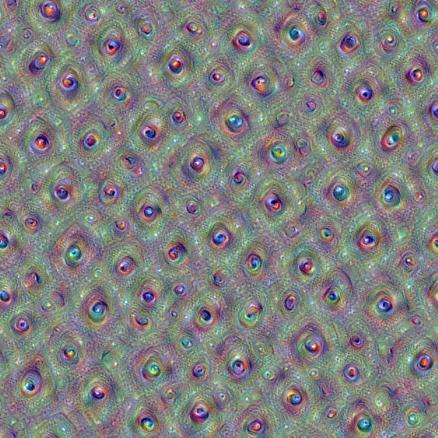

In [52]:
def render_multiscale(t_obj, img0=img_noise, iter_n=10, step=1.0, octave_n=3, octave_scale=1.4):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!
    
    img = img0.copy()
    for octave in range(octave_n):
        if octave>0:
            hw = np.float32(img.shape[:2])*octave_scale
            img = resize(img, np.int32(hw))
        for i in range(iter_n):
            g = calc_grad_tiled(img, t_grad)
            # normalizing the gradient, so the same step size should work 
            g /= g.std()+1e-8         # for different layers and networks
            img += g*step
            print('.', end = ' ')
        clear_output()
        showarray(visstd(img))

render_multiscale(T(layer)[:,:,:,channel])

In [53]:
k = np.float32([1,4,6,4,1])
k = np.outer(k, k)
k5x5 = k[:,:,None,None]/k.sum()*np.eye(3, dtype=np.float32)

def lap_split(img):
    '''Split the image into lo and hi frequency components'''
    with tf.name_scope('split'):
        lo = tf.nn.conv2d(img, k5x5, [1,2,2,1], 'SAME')
        lo2 = tf.nn.conv2d_transpose(lo, k5x5*4, tf.shape(img), [1,2,2,1])
        hi = img-lo2
    return lo, hi

def lap_split_n(img, n):
    '''Build Laplacian pyramid with n splits'''
    levels = []
    for i in range(n):
        img, hi = lap_split(img)
        levels.append(hi)
    levels.append(img)
    return levels[::-1]

def lap_merge(levels):
    '''Merge Laplacian pyramid'''
    img = levels[0]
    for hi in levels[1:]:
        with tf.name_scope('merge'):
            img = tf.nn.conv2d_transpose(img, k5x5*4, tf.shape(hi), [1,2,2,1]) + hi
    return img

def normalize_std(img, eps=1e-10):
    '''Normalize image by making its standard deviation = 1.0'''
    with tf.name_scope('normalize'):
        std = tf.sqrt(tf.reduce_mean(tf.square(img)))
        return img/tf.maximum(std, eps)

def lap_normalize(img, scale_n=4):
    '''Perform the Laplacian pyramid normalization.'''
    img = tf.expand_dims(img,0)
    tlevels = lap_split_n(img, scale_n)
    tlevels = list(map(normalize_std, tlevels))
    out = lap_merge(tlevels)
    return out[0,:,:,:]

# Showing the lap_normalize graph with TensorBoard
lap_graph = tf.Graph()
with lap_graph.as_default():
    lap_in = tf.placeholder(np.float32, name='lap_in')
    lap_out = lap_normalize(lap_in)
show_graph(lap_graph)

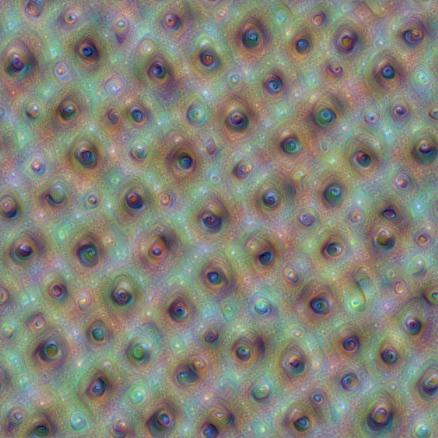

In [54]:
def render_lapnorm(t_obj, img0=img_noise, visfunc=visstd,
                   iter_n=10, step=1.0, octave_n=3, octave_scale=1.4, lap_n=4):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!
    # build the laplacian normalization graph
    lap_norm_func = tffunc(np.float32)(partial(lap_normalize, scale_n=lap_n))

    img = img0.copy()
    for octave in range(octave_n):
        if octave>0:
            hw = np.float32(img.shape[:2])*octave_scale
            img = resize(img, np.int32(hw))
        for i in range(iter_n):
            g = calc_grad_tiled(img, t_grad)
            g = lap_norm_func(g)
            img += g*step
            print('.', end = ' ')
        clear_output()
        showarray(visfunc(img))

render_lapnorm(T(layer)[:,:,:,channel])

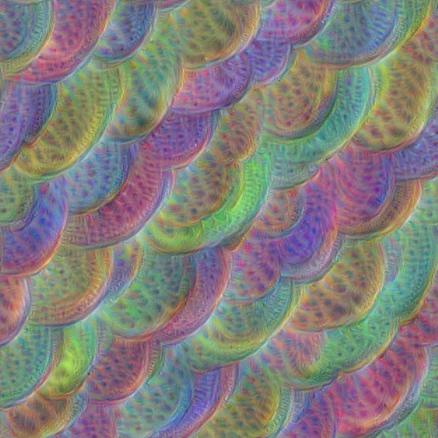

In [55]:
render_lapnorm(T(layer)[:,:,:,65])

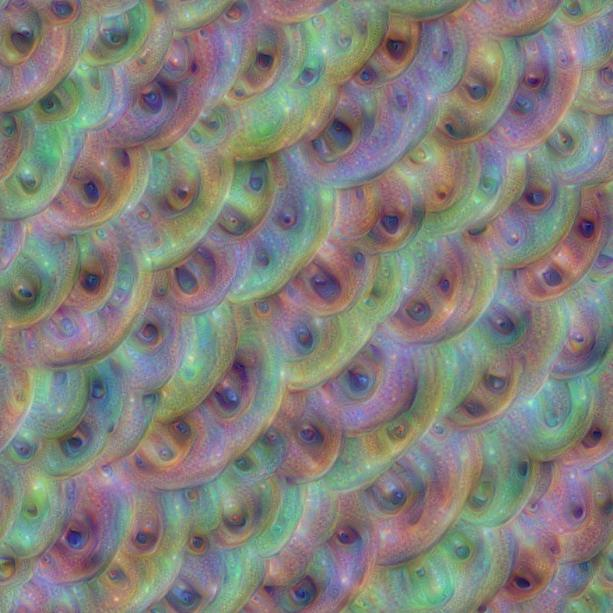

In [56]:
render_lapnorm(T(layer)[:,:,:,65]+T(layer)[:,:,:,3], octave_n=4)

In [57]:
def render_deepdream(t_obj, img0=img_noise,
                     iter_n=10, step=1.5, octave_n=4, octave_scale=1.4):
    t_score = tf.reduce_mean(t_obj) # defining the optimization objective
    t_grad = tf.gradients(t_score, t_input)[0] # behold the power of automatic differentiation!

    # split the image into a number of octaves
    img = img0
    octaves = []
    for i in range(octave_n-1):
        hw = img.shape[:2]
        lo = resize(img, np.int32(np.float32(hw)/octave_scale))
        hi = img-resize(lo, hw)
        img = lo
        octaves.append(hi)
    
    # generate details octave by octave
    for octave in range(octave_n):
        if octave>0:
            hi = octaves[-octave]
            img = resize(img, hi.shape[:2])+hi
        for i in range(iter_n):
            g = calc_grad_tiled(img, t_grad)
            img += g*(step / (np.abs(g).mean()+1e-7))
            print('.',end = ' ')
        clear_output()
        showarray(img/255.0)

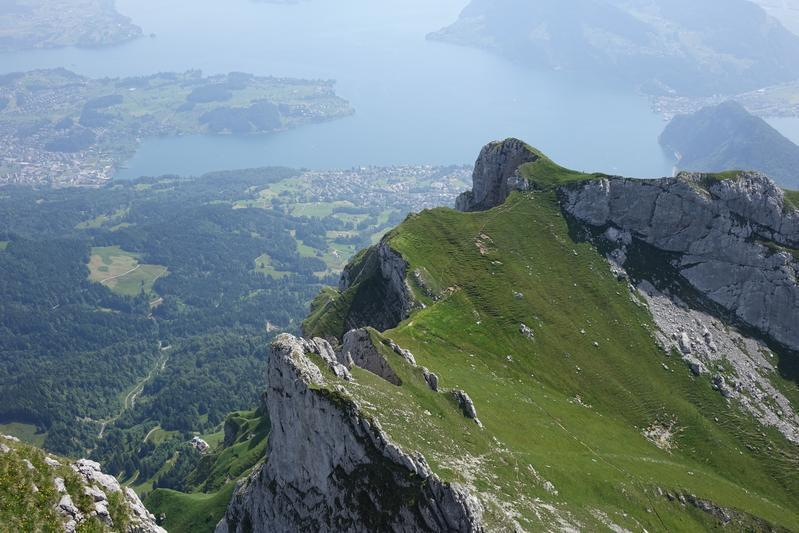

In [61]:
img = PIL.Image.open('./images/test_deep.jpg')
img = np.float32(img)
showarray(img/255.0)

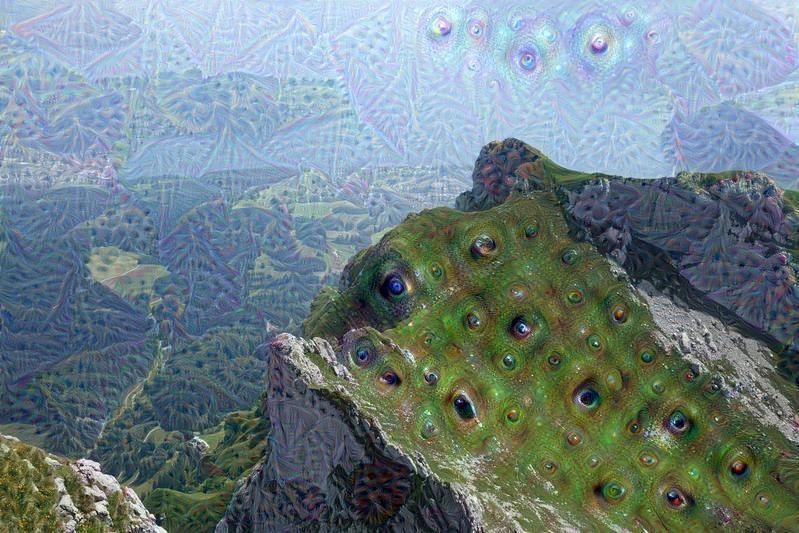

In [62]:
render_deepdream(tf.square(T(layer)[:,:,:,3]),img)

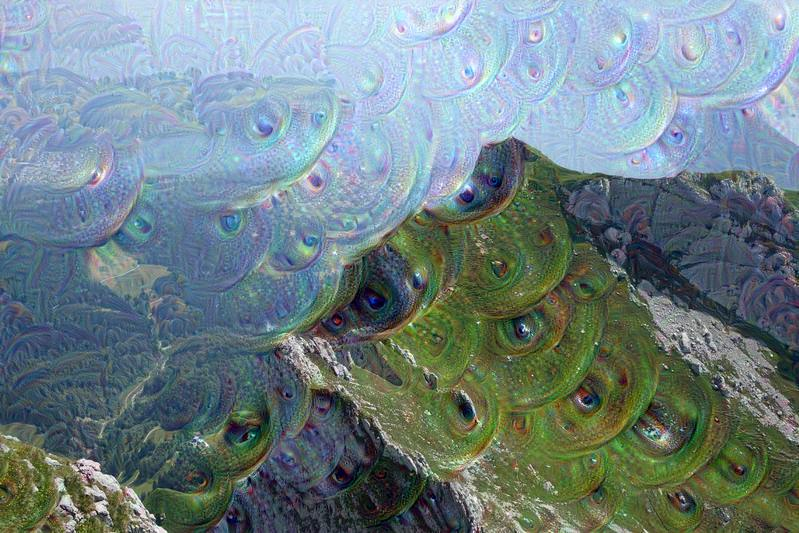

In [63]:
render_deepdream(tf.square(T(layer)[:,:,:,65]+T(layer)[:,:,:,3]),img)